<a href="https://colab.research.google.com/github/Pythonash/Kaggle-eng-/blob/Brain/end_to_end_simple_and_powerful_dnn_with_leakyrelu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to my notebook

Hi all, I have uploaded several notebooks for beginners who does not know how to participate in competition.

Now, I will show you my end-to-end procedure which contains loading dataset, training model, and submitting the result.

Furthermore, it will be helpful to you who want to use neural network with tensorflow and keras.

my notebook, version 2, acheived 0.146 score!

Here, there are many chances to upgrade the model through handling hyper-parameter so that you can improve your score in leaderboard.

If you have any questions, please leave the comments.


## **Knowledge can be improved by being shared.**

Please upvote!!


## [You can learn more skills for handling dataset or neural network.]

- [Parallel DNN and CNN network for beginners](https://www.kaggle.com/pythonash/parallel-dnn-and-cnn-network-for-beginners) - **Pawpularity Contest (silver medal)**

- [Handling image and csv dataset at the same time](https://www.kaggle.com/pythonash/how-to-use-csv-and-img-at-the-same-time) - **Pawpularity Contest (bronze medal)**
 
- [Image data handling without memory exploded](https://www.kaggle.com/pythonash/how-to-handle-dataset-for-beginners) - **Pawpularity Contest (bronze medal)**

- [Data handling & Deep learning](https://www.kaggle.com/pythonash/how-to-handle-raw-dataset-and-analyze-with-dl) - **Titanic competition (best score!!, bronze medal)**

- [Deep learning model with SeLU activation function](https://www.kaggle.com/pythonash/selu-activation-function-in-dl) - **Titanic competition (bronze medal)**

- [Preparing a completed dataset with proper imputation method](https://www.kaggle.com/pythonash/making-completed-dataset) - **Titanic competition**
 
 
 
### [More contents or information]

## [Pythonash Github](https://github.com/pythonash)

## [Pythonash blog](https://pythonash.github.io/ash)

**Let's start!**

# Contents

<a id="toc"></a>
- [1. Import Library](#1)
- [2. Load dataset](#2)
    - [2.1 Dataset](#2.1) 
- [3. Model ](#3)
    - [3.1 KFold strategy](#3.1)
- [4. Submit](#4)
- [5. Review](#5)

<a id="1"></a>
# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import ubiquant
from sklearn.model_selection import KFold
from scipy.stats import pearsonr

<a id="2"></a>
# Load dataset

As you may know, this competition's dataset (18.55gb) is too large.

So, we will use another dataset is converted low memory (about 3.63gb).

You can see the description on [ubiquant-parquet](https://www.kaggle.com/c/ubiquant-market-prediction/discussion/301724) and add the data by searching as below:

Thank you for sharing!! @Rob Mulla

**Click " + Add data" on upper right**

![스크린샷 2022-02-17 오후 2.21.19.png](attachment:8c78927a-a2bb-4e43-9001-1fc6a446d7df.png)

**Next, search "ubiquant" and click add**


![스크린샷 2022-02-17 오후 2.22.36.png](attachment:3e361b4c-00c2-4587-a5ef-98cc61b8463d.png)

After above procedures, load the parquet.

see the dataset.

<a id="2.1"></a>
# Dataset

In [ ]:
df = pd.read_parquet('../input/ubiquant-parquet/train_low_mem.parquet')
df

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141405,1219_3768,1219,3768,0.033600,0.093530,-0.720275,-0.345497,-0.438781,-0.166972,-0.437182,...,-0.285908,-1.232434,-0.660579,0.875537,0.421628,-0.428097,-0.075548,-0.533092,-0.193732,-0.581394
3141406,1219_3769,1219,3769,-0.223264,-1.344935,-0.199987,-0.107702,-0.454677,-0.221914,-0.141174,...,0.184517,-1.232434,-0.670493,0.875537,0.421628,-0.729949,-1.514277,0.013145,-0.890270,-0.589705
3141407,1219_3770,1219,3770,-0.559415,0.979489,-1.110491,1.006980,-0.467307,-0.159549,1.355671,...,-0.756332,-1.232434,0.820784,-1.142157,0.421628,-0.363329,1.363181,-0.079106,-1.580124,-0.297625
3141408,1219_3772,1219,3772,0.009599,-2.565332,0.320301,0.076600,1.380182,-0.155366,-0.689000,...,-0.756332,-1.232434,0.133074,-1.142157,0.421628,-0.375288,-1.514277,-0.973762,0.608647,-0.372040


## There is no missing value.

In [ ]:
df.isnull().sum().sum()

0

## What is the shape of submission??

In [ ]:
pd.read_parquet('../input/ubiquant-parquet/example_sample_submission.parquet')

,row_id,time_id,target
0,1220_1,1220,0
1,1220_2,1220,0
2,1221_0,1221,0
3,1221_1,1221,0
4,1221_2,1221,0
5,1222_0,1222,0
6,1222_1,1222,0
7,1222_2,1222,0
8,1223_0,1223,0


## I will use all features

In fact, I have already done the EDA and some statistical approaches.

But I identified that the result would be good when all the data was used.

Of course, although my approach might not be perfect, you will get robust score by tuning the hyper-parameter.

## Data columns

In [ ]:
df.columns

Index(['row_id', 'time_id', 'investment_id', 'target', 'f_0', 'f_1', 'f_2',
       'f_3', 'f_4', 'f_5',
       ...
       'f_290', 'f_291', 'f_292', 'f_293', 'f_294', 'f_295', 'f_296', 'f_297',
       'f_298', 'f_299'],
      dtype='object', length=304)

## Use the features, f_0 ~ f_299.

In [ ]:
f_col = df.drop(['row_id','time_id','investment_id','target'],axis=1).columns
f_col

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       ...
       'f_290', 'f_291', 'f_292', 'f_293', 'f_294', 'f_295', 'f_296', 'f_297',
       'f_298', 'f_299'],
      dtype='object', length=300)

## We will convert "investment_id" column with StandardScaler in sklearn.

Since "f_#" columns are similar to standard normal distribution, "investment_id" column will be converted for efficient training.

To apply the same criteria at test dataset, make the scaler and use it later.

In [ ]:
scaler = StandardScaler()
scaler.fit(pd.DataFrame(df['investment_id']))

StandardScaler()

## Make dataset function.

The test dataset will be given in last code cell by specific API.

So, we will use "make dataset function" efficiently.

In [ ]:
def make_dataset(df):
    inv_df = df['investment_id']
    f_df = df[f_col]
    scaled_investment_id = scaler.transform(pd.DataFrame(inv_df))
    df['investment_id'] = scaled_investment_id
    data_x = pd.concat([df['investment_id'], f_df], axis=1)
    return data_x

## Change the data type

Notebook memory has limit which is too small to use raw data.

So, change the data type to "float16".

And divide the dataset into variables for input and output.

## Input variables

In [ ]:
df=df.astype('float16')
df_x = make_dataset(df)
df_x

,investment_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,-1.738281,0.932617,0.113708,-0.402100,0.378418,-0.203979,-0.413574,0.965820,1.230469,0.114807,...,0.365967,-1.095703,0.200073,0.819336,0.941406,-0.086792,-1.086914,-1.044922,-0.287598,0.321533
1,-1.737305,0.811035,-0.514160,0.742188,-0.616699,-0.194214,1.771484,1.427734,1.133789,0.114807,...,-0.154175,0.912598,-0.734375,0.819336,0.941406,-0.387695,-1.086914,-0.929688,-0.974121,-0.343506
2,-1.734375,0.394043,0.615723,0.567871,-0.607910,0.068909,-1.083008,0.979492,-1.125977,0.114807,...,-0.138062,0.912598,-0.551758,-1.220703,-1.060547,-0.219116,-1.086914,-0.612305,-0.113953,0.243652
3,-1.733398,-2.343750,-0.011871,1.875000,-0.606445,-0.586914,-0.815918,0.778320,0.299072,0.114807,...,0.382080,0.912598,-0.266357,-1.220703,0.941406,-0.608887,0.104919,-0.783203,1.151367,-0.773438
4,-1.732422,0.842285,-0.262939,2.330078,-0.583496,-0.618164,-0.742676,-0.946777,1.230469,0.114807,...,-0.170410,0.912598,-0.741211,-1.220703,0.941406,-0.588379,0.104919,0.753418,1.345703,-0.737793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141405,1.737305,0.093506,-0.720215,-0.345459,-0.438721,-0.166992,-0.437256,1.475586,1.284180,0.056427,...,-0.285889,-1.232422,-0.660645,0.875488,0.421631,-0.427979,-0.075562,-0.533203,-0.193726,-0.581543
3141406,1.737305,-1.344727,-0.199951,-0.107727,-0.454590,-0.221924,-0.141113,-1.498047,1.374023,0.056427,...,0.184570,-1.232422,-0.670410,0.875488,0.421631,-0.729980,-1.514648,0.013145,-0.890137,-0.589844
3141407,1.739258,0.979492,-1.110352,1.006836,-0.467285,-0.159546,1.355469,0.150757,-0.088928,0.056427,...,-0.756348,-1.232422,0.820801,-1.142578,0.421631,-0.363281,1.363281,-0.079102,-1.580078,-0.297607
3141408,1.741211,-2.564453,0.320312,0.076599,1.379883,-0.155396,-0.688965,0.381104,-1.325195,0.056427,...,-0.756348,-1.232422,0.133057,-1.142578,0.421631,-0.375244,-1.514648,-0.973633,0.608887,-0.372070


## Target variable

In [ ]:
df_y = pd.DataFrame(df['target'])
df_y

,target
0,-0.300781
1,-0.231079
2,0.568848
3,-1.064453
4,-0.531738
...,...
3141405,0.033600
3141406,-0.223267
3141407,-0.559570
3141408,0.009598


## Delete raw data

To prevent notebook memory from exlporing, delete raw data.

In [ ]:
del df

<a id="3"></a>
# Model

We will use a simple deep neural network.

The brief descriptions are as follows:

## 1. Use LeakyReLU activation.

- You can set a parpameter.

## 2. Use BatchNormalization.

- It is mainly used before activation function layer.

## 3. Use Dropout.

- You can change the raito.

## 4. Use kernel_initializer with 'he_normal'.

- 'he_normal' initializer strategy works well with derivatives of relu.

## 5. Use ExponentialDecay scheduling.

- It will be great for improving your performance.

## 6. Use ModelCheckpoint.

- To save your best performance, we will use ModelChechpoint in callbacks parameter.


In [ ]:
def pythonash_model():
    inputs_ = tf.keras.Input(shape = [df_x.shape[1]])
    x = tf.keras.layers.Dense(64, kernel_initializer = 'he_normal')(inputs_)
    batch = tf.keras.layers.BatchNormalization()(x)
    leaky = tf.keras.layers.LeakyReLU(0.1)(batch)
    
    x = tf.keras.layers.Dense(128, kernel_initializer = 'he_normal')(leaky)
    batch = tf.keras.layers.BatchNormalization()(x)
    leaky = tf.keras.layers.LeakyReLU(0.1)(batch)
    
    x = tf.keras.layers.Dense(256, kernel_initializer = 'he_normal')(leaky)
    batch = tf.keras.layers.BatchNormalization()(x)
    leaky = tf.keras.layers.LeakyReLU(0.1)(batch)
    
    x = tf.keras.layers.Dense(512, kernel_initializer = 'he_normal')(leaky)
    batch = tf.keras.layers.BatchNormalization()(x)
    leaky = tf.keras.layers.LeakyReLU(0.1)(batch)
    
    x = tf.keras.layers.Dense(256, kernel_initializer = 'he_normal')(leaky)
    batch = tf.keras.layers.BatchNormalization()(x)
    leaky = tf.keras.layers.LeakyReLU(0.1)(batch)
    drop = tf.keras.layers.Dropout(0.4)(leaky)
    
    x = tf.keras.layers.Dense(128, kernel_initializer = 'he_normal')(drop)
    batch = tf.keras.layers.BatchNormalization()(x)
    leaky = tf.keras.layers.LeakyReLU(0.1)(batch)
    
    x = tf.keras.layers.Dense(8, kernel_initializer = 'he_normal')(leaky)
    batch = tf.keras.layers.BatchNormalization()(x)
    leaky = tf.keras.layers.LeakyReLU(0.1)(batch)
    drop = tf.keras.layers.Dropout(0.4)(leaky)
    
    outputs_ = tf.keras.layers.Dense(1)(drop)
    
    model = tf.keras.Model(inputs = inputs_, outputs = outputs_)
    
    rmse = tf.keras.metrics.RootMeanSquaredError()

    learning_sch = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.003,
    decay_steps = 9700,
    decay_rate = 0.98)
    adam = tf.keras.optimizers.Adam(learning_rate = learning_sch)
    
    model.compile(loss = 'mse', metrics = rmse, optimizer = adam)
    return model

pythonash_model().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 301)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                19328     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0     

2022-02-17 06:50:51.293560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 06:50:51.379260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 06:50:51.380015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 06:50:51.381259: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

## Model graphic

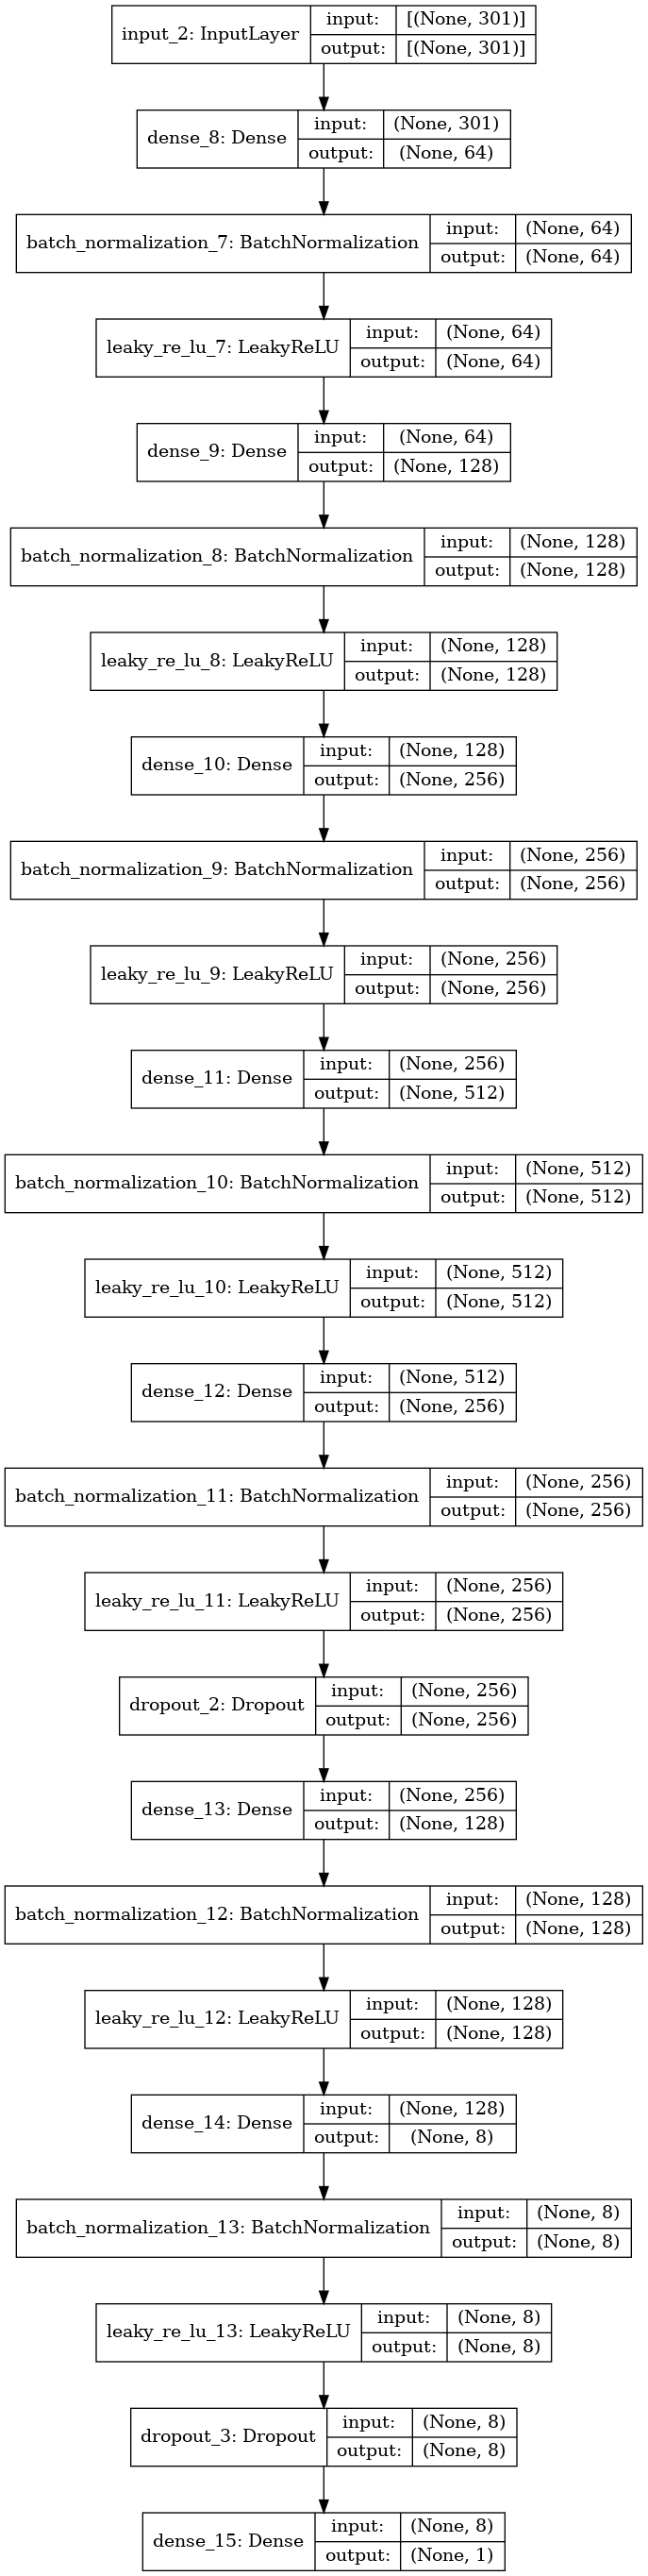

In [ ]:
tf.keras.utils.plot_model(pythonash_model(),show_shapes=True,expand_nested=True)

<a id="3.1"></a>
# KFold strategy

KFold strategy is good at evaluating robust.

Furthermore, using kfold is of use for training procedure and overfitting, because we have plenty of dataset.

In [ ]:
kfold_generator = KFold(n_splits =5, shuffle=True, random_state = 2022)
kfold_generator

KFold(n_splits=5, random_state=2022, shuffle=True)

## Model fitting

We can use KFold strategy by using "for" structure.

In [ ]:
# Write your model name down in 'pythonash_model.h5'.
callbacks = tf.keras.callbacks.ModelCheckpoint('pythonash_model.h5', save_best_only = True)
for train_index, val_index in kfold_generator.split(df_x, df_y):
    # Split training dataset.
    train_x, train_y = df_x.iloc[train_index], df_y.iloc[train_index]
    # Split validation dataset.
    val_x, val_y = df_x.iloc[val_index], df_y.iloc[val_index]
    # Make tensor dataset.
    tf_train = tf.data.Dataset.from_tensor_slices((train_x, train_y)).shuffle(2022).batch(1024, drop_remainder=True).prefetch(1)
    tf_val = tf.data.Dataset.from_tensor_slices((val_x, val_y)).shuffle(2022).batch(1024, drop_remainder=True).prefetch(1)
    # Load model
    model = pythonash_model()
    # Model fitting
    
    ## I used 5 epochs for fast save.
    ## Change the epochs into more numbers.
    model.fit(tf_train, callbacks = callbacks, epochs = 5, #### change the epochs into more numbers.
             validation_data = (tf_val), shuffle=True)
    # Delete tensor dataset and model for avoiding memory exploring.
    del tf_train
    del tf_val
    del model

2022-02-17 06:51:06.216617: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1512903056 exceeds 10% of free system memory.
2022-02-17 06:51:07.770172: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1512903056 exceeds 10% of free system memory.
2022-02-17 06:51:09.174804: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 378225764 exceeds 10% of free system memory.
2022-02-17 06:51:09.540961: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 378225764 exceeds 10% of free system memory.
2022-02-17 06:51:09.967924: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1512903056 exceeds 10% of free system memory.


Epoch 1/5


2022-02-17 06:51:13.239234: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2454/2454 [==============================] - 20s 7ms/step - loss: 0.8409 - root_mean_squared_error: 0.9170 - val_loss: 0.8423 - val_root_mean_squared_error: 0.9178
Epoch 2/5
2454/2454 [==============================] - 18s 7ms/step - loss: 0.8312 - root_mean_squared_error: 0.9117 - val_loss: 0.8423 - val_root_mean_squared_error: 0.9178
Epoch 3/5
2454/2454 [==============================] - 17s 7ms/step - loss: 0.8298 - root_mean_squared_error: 0.9109 - val_loss: 0.8408 - val_root_mean_squared_error: 0.9170
Epoch 4/5
2454/2454 [==============================] - 17s 7ms/step - loss: 0.8286 - root_mean_squared_error: 0.9103 - val_loss: 0.8404 - val_root_mean_squared_error: 0.9167
Epoch 5/5
2454/2454 [==============================] - 17s 7ms/step - loss: 0.8279 - root_mean_squared_error: 0.9099 - val_loss: 0.8392 - val_root_mean_squared_error: 0.9161
Epoch 1/5
2454/2454 [==============================] - 19s 7ms/step - loss: 0.8458 - root_mean_squared_error: 0.9197 - val_loss: 0.8373 - va

<a id="4"></a>
# Submit

To submit your result, follow the code given by [competetion overview evaluation](https://www.kaggle.com/c/ubiquant-market-prediction/overview/evaluation).

If you don't know how it works, just run the code as below:




In [ ]:
best_model = tf.keras.models.load_model('pythonash_model.h5')
env = ubiquant.make_env()   
iter_test = env.iter_test()    
for (test_df, sample_prediction_df) in iter_test:
    test_df = make_dataset(test_df)
    sample_prediction_df['target'] = best_model.predict(test_df)  
    env.predict(sample_prediction_df)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.


<a id="5"></a>
# Review

I want to share my experiences that I have tried to improve the performance.

## 1. It might not be perfect to use more neurons.

> I recommend you to stack more layers rather than using more neurons.

## 2. Change the learning rate or LeakyReLU parameter.

- When LeakyReLU was used with 0.4 and initial learning rate was 0.001, I achieved the score, 0.146.

- LeakyReLU would be great rather than 'relu' or 'elu' in my notebook.

- When LeakyReLU was used with 0.1 and initial learning rate was 0.001, I achieved the score, 0.147.

## 3. To use both ModelCheckpoint and EarlyStopping at the same time makes the memory explore.


## **It has done!!**

If this notebook is helpful to you, give me **upvotes!!**

Thank you for viewing.